# Ch 5 - Bayes Rule

### Basics and Intuition

$$P(A\, | \, B) = \frac{P(B \, | \, A)P(A)}{\sum_{a^*} P(B \, | \, a^*)P(a^*)}$$

where:  
$A$ = some specific fixed value A  
$a^*$ = all possible values for A

A really easy way of intuiting Bayes rule is to consider a joint probability table with its marginals:

**Table of Hair and Eye colour:**  

Hair Colour: $\rightarrow$||Black|Brunette|Red|Blonde|*Marginal*|
-|-|-
Eye Colour: $\downarrow$|Brown|0.11|0.20|0.04|0.01|0.37
|Blue|0.03|0.14|0.03|0.16|0.36
|Hazel|0.03|0.09|0.02|0.02|0.16
|Green|0.01|0.05|0.02|0.03|0.11
|_**Marginal**_|0.18|0.48|0.12|0.21|1.0

Essentially what we are doing wit Bayes Rule is isolating some element from the above table. For example:

$$P(\textrm{Red Hair} \, | \, \textrm{Hazel Eyes}) = \frac{P(\textrm{Hazel Eyes} \, | \, \textrm{Red Hair})P(\textrm{Red Hair})}{P(\textrm{Hazel Eyes})}$$

$$ = \frac{\frac{0.02}{0.12} * 0.12}{0.16}$$

$$ = \frac{0.2}{0.16}$$

In this particular case, I used Bayes Rule in a pretty convoluted way because $P(\textrm{Hazel Eyes} \, | \, \textrm{Red Hair})$ is just as hard as working out $P(\textrm{Red Hair} \, | \, \textrm{Hazel Eyes})$. To clarify this, note that each element in a given row or column is actually $P(element \,| \,row) \, P(row)$ or $P(element \, | \, column) \, P(column)$ respectively so the element itself already takes the **$P(A)$** term from the numerator (a.k.a. the prior) into account.

### Using Bayes Rule in practice:
$$P(\theta \, | \, D) = P(D \, | \, \theta) \, P(\theta) \, / \, P(D)$$
$$posterior \: = \: likelihood \: * \: prior \: / \: evidence$$

where:  
$$P(D) = \sum_{\theta^*} P(D \, | \, \theta^*) \, P(\theta^*)$$  
**NB** D stands for 'Data'

##### What if we are working with continuous values???
Same as above except:  
$$P(D) = \int p(D \, | \, \theta^*) \, p(\theta^*) \, d\theta^*$$

##### Does the order in which we apply evidence to update our prior matter?
It depends on the model we are using for our prior (and whether the model itself , but in most practical situations no.

### Coin Flipping #1

##### Modelling the scenario
Let a coin have 2 possible outcomes; heads (1) and tails (0).

Let $\theta$ be the probability that a heads will be the result of any given flip. Thus the probability of tails is '$1-\theta$'.

The liklihood of any given set of heads and tails $\{y_i\}$ can be denoted:

$$p(\{y_i\} \, | \theta) = \theta ^ {\sum_i y_i} \; (1 - \theta) ^ {\sum_i (1 - y_i)}$$

where:  
$\sum_i y_i$ = the number of heads  
$\sum_i (1 - y_i)$ = the number of tails

##### Representing a distribution
The simplest way of representing the possible values of $\theta$ in a discreet case are to imagine that it could be any of some finite number of values (e.g. [0, 0.1, 0.2, ..., 1.0]).

Lets imagine that we initially assume all of these values are equally likely, and that we then observe a result of a 'heads'.

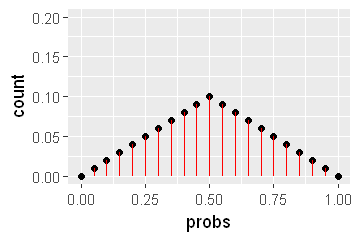

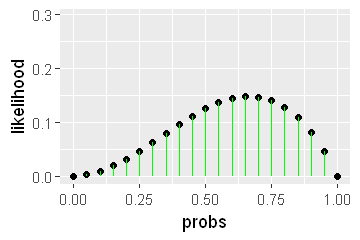

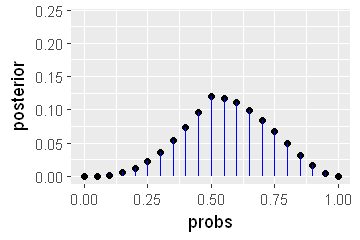

In [9]:
#Model our prior probabilities:
probs = seq(0, 1, 0.05)

#Generate a (uniform) prior distribution ( p(theta) ):
prior = rep(1, length(probs)) * (1/length(probs))
# OR Generate a centre-weighted prior distribution ( p(theta) ):
prior = append(seq(0, ceiling(length(probs)/2) - 1, 1), seq(floor(length(probs)/2) -1, 0, -1))
#Normalise
prior = prior / sum(prior)

#Observations ( D )
observation = c(1, 1, 0)

#Generate a likelihood function ( p(D | theta) )
get_likelihood = function(p){
    p ** (sum(observation)) * (1 - p) ** (length(observation) - sum(observation)) 
}
likelihood = sapply(probs, get_likelihood)

#Find the probability of the observation ( p(D) )
evidence = sum(prior * likelihood)

#Derive our posterior:
posterior = prior * likelihood / evidence

#Plot:
library(ggplot2)
library(repr)
options(repr.plot.width=3, repr.plot.height=2)

qplot() +
    geom_point(aes(x=probs, y=prior)) + 
    geom_segment(aes(x=probs, xend=probs, y=0, yend=prior), color = "red") + 
    ylim(c(0, min(c(2*max(prior), 1)))) +
    guides(color=FALSE)
           
qplot(probs, likelihood) +
    geom_segment(aes(x=probs, xend=probs, y=0, yend=likelihood), color = "green") + 
    ylim(c(0, min(c(2*max(likelihood), 1)))) +
    guides(color=FALSE)

qplot(probs, posterior)+ 
    geom_segment(aes(x=probs, xend=probs, y=0, yend=posterior), color = "blue") + 
    ylim(c(0, min(c(2*max(posterior), 1)))) +
    guides(color=FALSE)

### So if we can do this for days, why do we need any other methods for Bayesian Stats?
If we have many parameters (e.g. we are not just trying to find the $\theta$ for a coin flip but also many other things, then doing this method of 'combing' the sample space becomes intractible, even on modern computers.